In [0]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

%cd '/content/drive/My Drive/dhoa.github.io'
!git config --global user.email "dienhoa.t@gmail.com"
!git config --global user.name "dienhoa"

!git add .
!git commit -m "first commit"
!git push origin master

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd '/content/drive/My Drive/dhoa.github.io'

/content/drive/My Drive/dhoa.github.io


In [0]:
!git config --global user.email "dienhoa.t@gmail.com"
!git config --global user.name "Hoa"

In [0]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   _notebooks/loss_func.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git remote -v

origin	https://github.com/dienhoa/dhoa.github.io.git (fetch)
origin	https://github.com/dienhoa/dhoa.github.io.git (push)


In [0]:
!git add .

In [0]:
!git commit -m "first commit"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@f2754affe9a3.(none)')


In [0]:
!git config --global user.email "dienhoa.t@gmail.com"
!git config --global user.name "dienhoa"

In [0]:
!git commit -m "first commit"

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
	modified:   _notebooks/loss_func.ipynb

no changes added to commit


In [0]:
!git remote add origin https://dienhoa:<password>github@github.com/<username>/reponame.git

In [0]:
!git push origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [0]:
!pip install fastai2
!pip install nbdev

     |████████████████████████████████| 194kB 5.3MB/s 
     |████████████████████████████████| 51kB 3.0MB/s 


In [0]:
from fastai2.vision.all import *

In [0]:
path = untar_data(URLs.PETS)

In [0]:
items = get_image_files(path/'images')

In [0]:
item = items[0]

In [0]:
item

Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_23.jpg')

In [0]:
item.stem[0].isupper()

False

In [0]:
def label_func(fname):
    return "cat" if fname.name[0].isupper() else "dog"

In [0]:
labeller = RegexLabeller(pat=r"(.+)_\d+.jpg")

In [0]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    splitter=RandomSplitter(),
                    get_y = Pipeline([lambda x: getattr(x,'name'), labeller]),
                    item_tfms=Resize(224), 
                    batch_tfms=aug_transforms(),
                    )

In [0]:
dls = pets.dataloaders(path/'images')

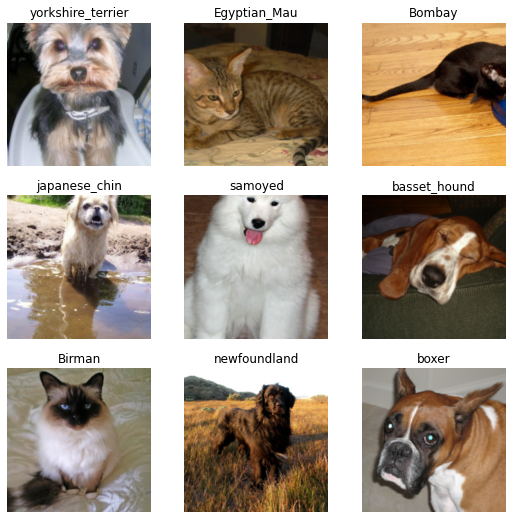

In [0]:
dls.show_batch()

In [0]:
learn = cnn_learner(dls, resnet18, loss_func=our_cross_entropy, metrics=error_rate)

In [0]:
learn = cnn_learner(dls, resnet18, loss_func=inverse_loss, metrics=error_rate)

In [0]:
learn = cnn_learner(dls, resnet18, loss_func=dot_product_loss, metrics=error_rate)

In [0]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.357865,1.076573,0.139378,00:50


epoch,train_loss,valid_loss,error_rate,time
0,1.115083,1.058115,0.104195,00:50


In [0]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.824922,1.162176,0.155616,00:49


epoch,train_loss,valid_loss,error_rate,time
0,1.248410,1.107818,0.102842,00:50


In [0]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.642085,0.396497,0.125169,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.557501,0.298374,0.101489,00:50


In [0]:
input = torch.randn(3,1, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)

In [0]:
input, target

(tensor([[ 0.4705],
         [-0.4377],
         [-0.3022]], requires_grad=True), tensor([4, 0, 0]))

In [0]:
input = torch.randn(3, 5)
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target)

In [0]:
input, target, loss

(tensor([[ 0.7829, -0.7753, -0.0460, -0.5882, -1.6432],
         [-0.9856, -0.7011, -0.1580,  1.7391, -0.3056],
         [ 1.0284, -0.0924,  1.9061,  0.9941, -0.1425]]),
 tensor([4, 1, 1]),
 tensor(2.8817))

In [0]:
pred = F.softmax(input, dim=1)

In [0]:
def our_cross_entropy(input, target):
    pred = softmax(input)
    loss = nl(pred, target)
    return loss

In [0]:


def softmax(x): return x.exp() / (x.exp().sum(-1)).unsqueeze(-1)
def nl(input, target): return -input[range(target.shape[0]), target].log().mean()

pred = softmax(input)
loss=nl(pred, target)

In [0]:
def inverse(input, target):
    return 

In [0]:
def inverse_loss(input, target):
    pred = softmax(input)
    return (1/((pred[range(target.shape[0]), target]).pow(0.15))).mean()

In [0]:
def dot_product_loss(input, target):
    pred = softmax(input)
    return -(pred[range(target.shape[0]), target]).mean()

In [0]:
dot_product_loss(input, target)

tensor(-0.5604)

In [0]:
inverse_loss(input, target)

tensor(72.0284)

In [0]:
input

tensor([[ 0.7829, -0.7753, -0.0460, -0.5882, -1.6432],
        [-0.9856, -0.7011, -0.1580,  1.7391, -0.3056],
        [ 1.0284, -0.0924,  1.9061,  0.9941, -0.1425]])

In [0]:
target = torch.tensor([0,3,2])

In [0]:
x = np.linspace(0.01,0.99,100)

In [0]:
x

array([0.01      , 0.01989899, 0.02979798, 0.03969697, 0.04959596,
       0.05949495, 0.06939394, 0.07929293, 0.08919192, 0.09909091,
       0.1089899 , 0.11888889, 0.12878788, 0.13868687, 0.14858586,
       0.15848485, 0.16838384, 0.17828283, 0.18818182, 0.19808081,
       0.2079798 , 0.21787879, 0.22777778, 0.23767677, 0.24757576,
       0.25747475, 0.26737374, 0.27727273, 0.28717172, 0.29707071,
       0.3069697 , 0.31686869, 0.32676768, 0.33666667, 0.34656566,
       0.35646465, 0.36636364, 0.37626263, 0.38616162, 0.39606061,
       0.4059596 , 0.41585859, 0.42575758, 0.43565657, 0.44555556,
       0.45545455, 0.46535354, 0.47525253, 0.48515152, 0.49505051,
       0.50494949, 0.51484848, 0.52474747, 0.53464646, 0.54454545,
       0.55444444, 0.56434343, 0.57424242, 0.58414141, 0.5940404 ,
       0.60393939, 0.61383838, 0.62373737, 0.63363636, 0.64353535,
       0.65343434, 0.66333333, 0.67323232, 0.68313131, 0.6930303 ,
       0.70292929, 0.71282828, 0.72272727, 0.73262626, 0.74252

In [0]:
y_log = -np.log(x)

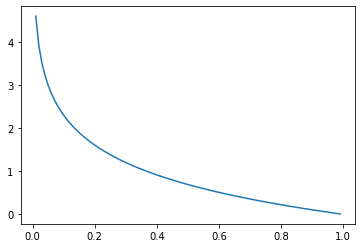

In [0]:
plt.plot(x, y_log)

In [0]:
y_inv = 1/np.power(x,0.4)

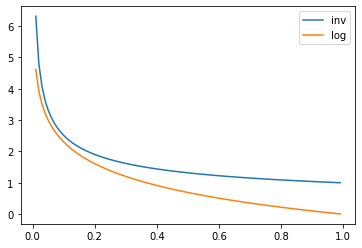

In [0]:
plt.plot(x, y_inv, label='inv')
plt.plot(x, y_log, label='log')
plt.legend()
plt.show()

In [0]:
input, target

(tensor([[ 0.7829, -0.7753, -0.0460, -0.5882, -1.6432],
         [-0.9856, -0.7011, -0.1580,  1.7391, -0.3056],
         [ 1.0284, -0.0924,  1.9061,  0.9941, -0.1425]]), tensor([4, 1, 1]))

In [0]:
F.softmax(input, dim=1)

tensor([[0.5027, 0.1058, 0.2195, 0.1276, 0.0444],
        [0.0458, 0.0608, 0.1047, 0.6983, 0.0904],
        [0.1997, 0.0651, 0.4803, 0.1930, 0.0619]])

In [0]:
target

tensor([4, 1, 1])

In [0]:
pred[range(target.shape[0]), target].log()

tensor([-3.1139, -2.7994, -2.7317])

In [0]:
math.log(0.0444) ,math.log(0.0608) ,math.log(0.0608)

(-3.114515809543958, -2.800165490010016, -2.800165490010016)

In [0]:
pred

tensor([[0.5027, 0.1058, 0.2195, 0.1276, 0.0444],
        [0.0458, 0.0608, 0.1047, 0.6983, 0.0904],
        [0.1997, 0.0651, 0.4803, 0.1930, 0.0619]])

In [0]:
input[range(pred.shape[0]), pred]

IndexError: ignored

In [0]:
import math

In [0]:
learn = cnn_learner(dls,resnet18, loss_func=F.cross_entropy)

In [0]:
cross_entropy = F.cross_entropy

In [0]:
loss = nn.CrossEntropyLoss()

In [0]:
input = torch.randn(3,5, requires_grad=True)

In [0]:
input

tensor([[ 0.5198, -0.5623, -0.9951,  1.3203,  1.5169],
        [-0.2748, -0.0607,  0.0349,  0.3257,  0.7164],
        [ 0.5257, -0.0883, -0.7506, -0.1406, -0.6371]], requires_grad=True)

In [0]:
target = torch.empty(3, dtype=torch.long).random_(5)

In [0]:
target

tensor([3, 4, 2])

In [0]:
output = loss(input, target)

In [0]:
output

tensor(2.0798, grad_fn=<NllLossBackward>)

In [0]:
>>> loss = nn.CrossEntropyLoss()
>>> input = torch.randn(3, 5, requires_grad=True)
>>> target = torch.empty(3, dtype=torch.long).random_(5)
>>> output = loss(input, target)
>>> output.backward()

In [0]:
cross_entropy()

In [0]:
learn.fine_tune(1)

KeyboardInterrupt: ignored

In [0]:
re.search(r'Eat\sCake', "Eat Cake").group()

'Eat Cake'

### Instructions

In [0]:
email_adress = "Please contact us at: support@datacamp.com"

In [0]:
match

In [0]:
from fastai2.vision.all import *

NameError: ignored

In [0]:
from fastai2 import *

In [0]:
from fastai2.vision.all import untar_data

NameError: ignored

In [0]:
from 

In [0]:
path = untar_data

NameError: ignored

In [0]:
!pip install fastai2

In [0]:
%%capture
import sys
if 'google.colab' in sys.modules:
  !pip install git+git://github.com/fastai/fastai2.git

from fastai2.vision.all import *

NameError: ignored

In [0]:
path = untar_data('https://storage.googleapis.com/ml-animal-sounds-datasets/macaques_24414Hz.zip')

def get_items(path): return get_files(path)

def get_y(path): return path.parent.stem

def get_x(path, target_rate=24414, num_samples=18310):
    n_fft = 1024
    hop_length = 30
    x, rate = torchaudio.load_wav(path)
    if rate != target_rate: 
      x = torchaudio.transforms.Resample(orig_freq=rate, new_freq=24414, resampling_method='sinc_interpolation')(x)
    x = x[0] / 32767
    x = x.numpy()
    x = librosa.util.fix_length(x, num_samples)
    x = librosa.util.pad_center(x, num_samples, mode='constant')
    stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
    stft_magnitude, stft_phase = librosa.magphase(stft)
    stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude)
    stft_magnitude_db = stft_magnitude_db - stft_magnitude_db.min()
    stft_magnitude_db = stft_magnitude_db / stft_magnitude_db.max() * 255 # we want the range of values for our data to be [0, 255]
                                   # this way fastai internally will be able to represent it as an image using PIL
    return stft_magnitude_db.astype(np.uint8)

In [0]:
#mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)

In [0]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_items,
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(seed=42))

In [0]:
dls = db.dataloaders(path, num_workers=12)

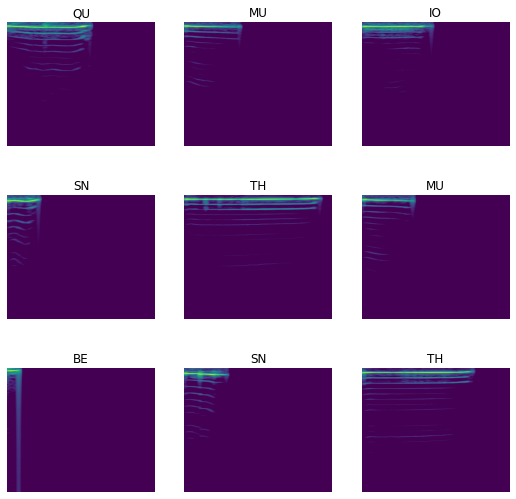

In [0]:
dls.show_batch()

In [0]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.620329,0.583106,0.179822,04:12


epoch,train_loss,valid_loss,error_rate,time
0,0.168138,0.167591,0.057653,04:14
1,0.071456,0.042807,0.015100,04:13


In [0]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix(figsize=(12,12), dpi=60)